# Data Preprocessing

## Bank Marketing Data Set 

URL: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Files Information:

There are four datasets: 

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

### Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

    5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

    6. Number of Attributes: 16 + output attribute.

### Attribute information:

   Input variables:
   #### bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: 
   "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   #### related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  


  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./bank/bank.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
def replace_marital(val):
    if val == "single":
        return 0
    else:
        return 1

df["marital"] = df["marital"].apply(replace_marital, 1)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df["housing"] = df["housing"].map({
    "no": 0,
    "yes": 1
}.get)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,1,secondary,no,-333,1,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,1,tertiary,yes,-3313,1,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,1,secondary,no,295,0,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,1,secondary,no,1137,0,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,0,tertiary,no,1136,1,yes,cellular,3,apr,345,2,249,7,other,no


In [10]:
df["loan"] = df["loan"].replace({
    "no": 0,
    "yes": 1
})

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,0,tertiary,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [13]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [14]:
df["job"].replace({
    'unknown': np.nan,
    'management': 0,
    'technician': 1,
    'entrepreneur': 2,
    'blue-collar': 3,
    'retired': 4,
    'admin.': 5,
    'services': 6,
    'self-employed': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 10
}, inplace=True)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,tertiary,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [17]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [18]:
df["education"].replace({
    'unknown': np.nan,
    'tertiary': 0, 
    'secondary': 1, 
    'primary': 2
}, inplace=True)

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [21]:
df["default"].replace({
    "no": 0,
    "yes": 1
}, inplace=True)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [24]:
df["balance"].min()

-3313

In [25]:
df["balance"].max()

71188

In [26]:
df["balance"] = df["balance"].apply(lambda v: (v - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [28]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,cellular,3,apr,345,2,249,7,other,no


In [29]:
df.contact.replace({"unknown": np.nan,
            "telephone": 0,
            "cellular": 1}, inplace=True)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [31]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,apr,345,2,249,7,other,no


In [32]:
df.contact.unique()

array([ 1., nan,  0.])

In [33]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [34]:
df.month = df.month.map({
    'oct': 10, 'may': 5, 'apr': 4, 'jun': 6, 'feb': 2, 'aug': 8, 'jan': 1, 'jul': 7, 'nov': 11,
       'sep': 9, 'mar': 3, 'dec': 12
})

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [36]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [37]:
df.poutcome = df.poutcome.map({
    'unknown': np.nan, 
    'failure': 0, 
    'other': 1, 
    'success': 2
})

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [39]:
df.pdays = df.pdays.apply(lambda v: (v-df.pdays.min())/(df.pdays.max()-df.pdays.min()))

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [41]:
df.y.replace({"no": 0, "yes": 1}, inplace=True)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [43]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,0.000000,0,NaN,0
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,5,153,1,0.000000,0,NaN,0
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,0.000000,0,NaN,0
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,0.243119,3,1.0,0
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,4,345,2,0.286697,7,1.0,0


In [44]:
df.y.unique()

array([0, 1])

In [45]:
df.duration = df.duration.apply(lambda v: ((v-df.duration.min())/(df.duration.max()-df.duration.min())))

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [47]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [48]:
df.to_csv("./bank/preprocessed.csv", index=False)

In [49]:
new_df = pd.read_csv("./bank/preprocessed.csv")

In [50]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [51]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.001264,0.410768,0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.001264,1.000000,-0.004633,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,-0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.050381,0.005100
marital,0.410768,-0.004633,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.190484,0.329417,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.017885,-0.000494,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,-0.027549,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.031556,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,-0.000807,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.071647,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,-0.013250,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

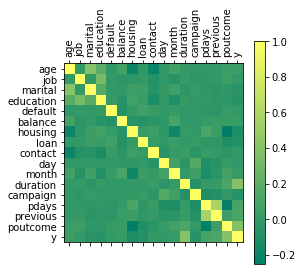

In [87]:
plt.matshow(new_df.corr(), cmap="summer")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation='vertical')
plt.yticks(list(range(len(new_df.columns))), new_df.columns, rotation='horizontal')

plt.show()

In [93]:
new_df.corr()["y"].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
age          0.045092
month        0.023335
balance      0.017905
job          0.005100
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

([<matplotlib.axis.XTick at 0x7f5308d23320>,
 <a list of 17 Text xticklabel objects>)

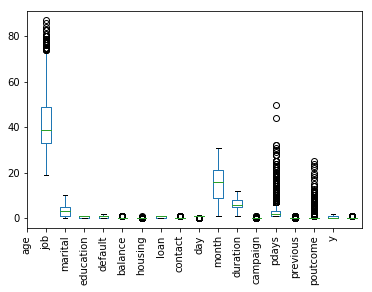

In [101]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation='vertical')

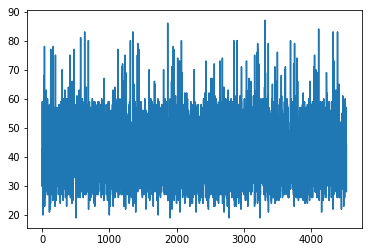

In [102]:
plt.plot(df.age.values)

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <a list of 10 Patch objects>)

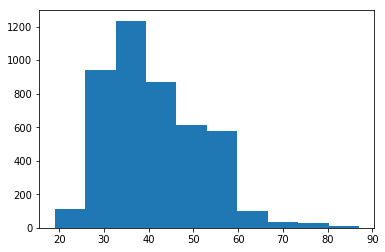

In [104]:
plt.hist(df.age.values)

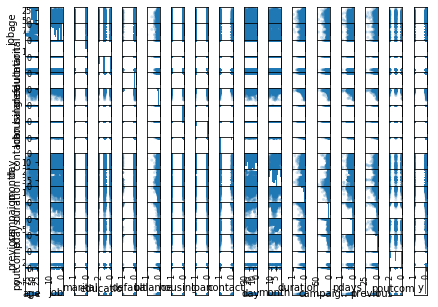

In [109]:
axes = pd.plotting.scatter_matrix(new_df, alpha=0.2)
plt.tight_layout()
plt.show()

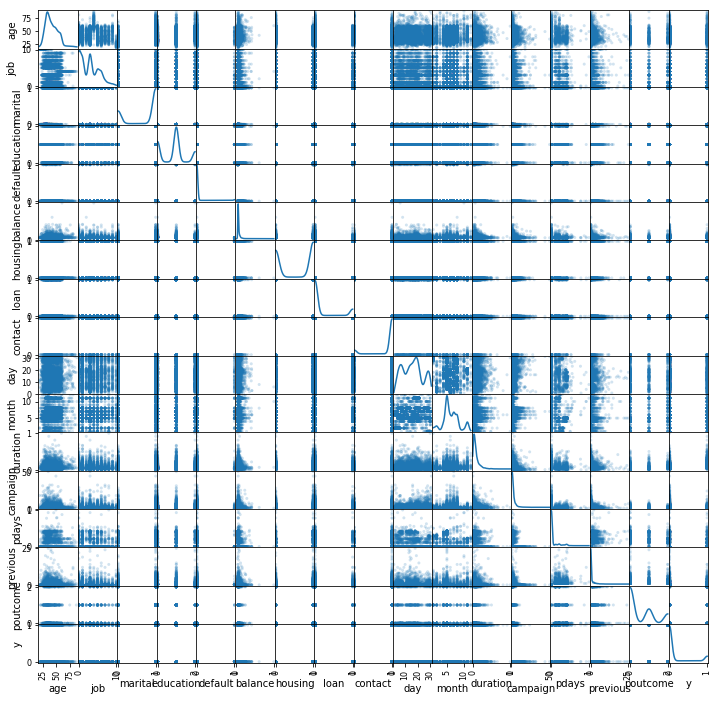

In [114]:
pd.plotting.scatter_matrix(new_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

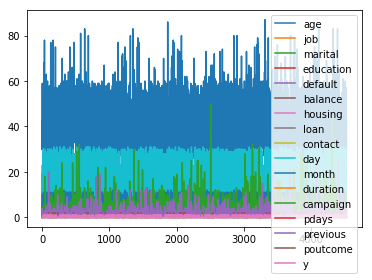

In [115]:
new_df.plot()

In [119]:
low = 0.01
high = 0.99
new_df.quantile([low, high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,24.0,0.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002052,1.0,0.000000,0.0,0.0,0.0
0.99,72.0,10.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.415425,16.0,0.425459,8.0,2.0,1.0


In [120]:
qdf = new_df.quantile([low, high])

In [121]:
qdf.age

0.01    24.0
0.99    72.0
Name: age, dtype: float64

In [123]:
qdf.age[low]

24.0

In [125]:
new_df.age = new_df.age.apply(lambda v: v if qdf.age[low] < v < qdf.age[high] else np.nan)

In [129]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [138]:
new_df.age.dropna(inplace=True)

In [139]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [140]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [141]:
new_df.age.unique()

array([30., 33., 35., 59., 36., 39., 41., 43., 31., 40., 56., 37., 25.,
       38., 42., 44., 26., 55., 67., 53., 68., 32., 49., 52., 34., 61.,
       45., 48., 57., 54., 63., 51., 29., 50., 27., 60., 28., 58., 46.,
       47., 70., 65., 64., 62., 66., 71., 69.])

{'boxes': [<matplotlib.lines.Line2D at 0x7f52e7a9ebe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f52e4d76630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f52e4d632e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52e4d76e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52e7a9ed30>,
  <matplotlib.lines.Line2D at 0x7f52e4d76208>]}

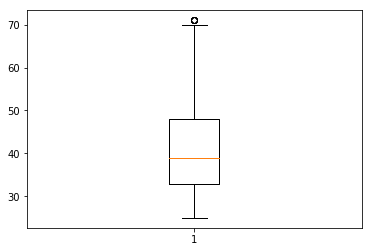

In [145]:
plt.boxplot(new_df.age)

In [146]:
new_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,95.098806,0.580407,1.710818,1.183271,-0.015047,0.030235,-0.844954,0.009882,-0.455416,-1.633041,1.708845,-0.016781,-0.083784,-0.022474,-0.335006,0.187671,0.051717
job,0.580407,7.158681,-0.005472,0.583008,-0.000171,-0.002985,-0.041797,-0.000779,-0.057406,-0.291942,-0.421821,0.002488,-0.164752,-0.003313,0.011899,0.102526,0.004348
marital,1.710818,-0.005472,0.194603,0.050009,-0.000419,-0.000134,0.009063,0.007699,-0.007486,-0.024628,0.064926,-0.000932,0.011102,-0.001048,-0.026565,-0.003355,-0.006454
education,1.183271,0.583008,0.050009,0.443989,0.000997,-0.001524,0.023981,0.006013,-0.022508,-0.093661,-0.131709,0.000643,-0.020258,-0.000881,-0.034476,-0.011456,-0.011808
default,-0.015047,-0.000171,-0.000419,0.000997,0.016532,-0.000368,0.000439,0.002961,0.000847,-0.014062,0.002727,-0.000128,-0.004937,-0.000389,-0.005804,0.001487,0.000053
balance,0.030235,-0.002985,-0.000134,-0.001524,-0.000368,0.001632,-0.001006,-0.001037,-0.000438,-0.002891,0.009596,-0.000055,-0.001253,0.000044,0.001792,0.000618,0.000231
housing,-0.844954,-0.041797,0.009063,0.023981,0.000439,-0.001006,0.245695,0.003291,0.006790,-0.127923,-0.201501,0.000671,-0.005509,0.006653,0.032420,-0.091682,-0.016571
loan,0.009882,-0.000779,0.007699,0.006013,0.002961,-0.001037,0.003291,0.129510,0.000756,-0.014483,0.033575,-0.000155,0.019160,-0.001284,-0.013478,-0.023561,-0.008104
contact,-0.455416,-0.057406,-0.007486,-0.022508,0.000847,-0.000438,0.006790,0.000756,0.085313,-0.131600,0.011419,0.000671,-0.030056,0.000918,0.000938,-0.008153,-0.000216
day,-1.633041,-0.291942,-0.024628,-0.093661,-0.014062,-0.002891,-0.127923,-0.014483,-0.131600,68.024016,1.577849,-0.017473,4.121894,-0.089349,-0.825706,0.117800,-0.029616


In [147]:
new_df.to_csv("./bank/preprocessed.csv", index=False)

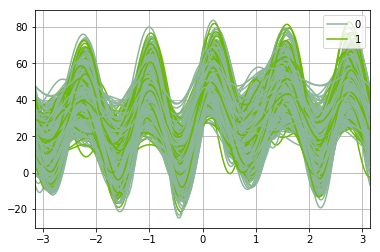

In [152]:
from pandas.plotting import andrews_curves
andrews_curves(new_df, 'y')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52e430bf28>,
      dtype=object)

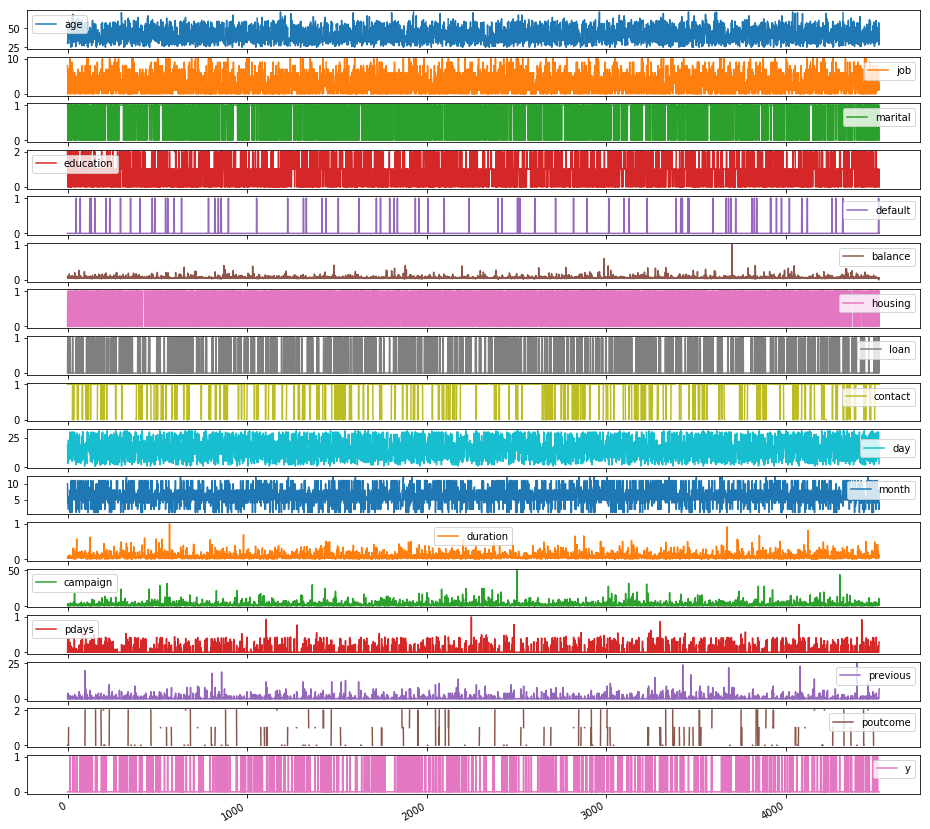

In [155]:
new_df.plot(subplots=True, figsize=(16, 16))

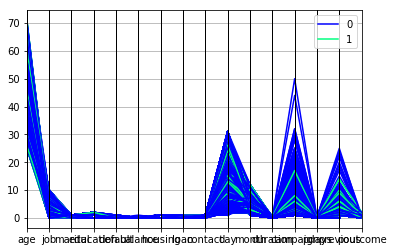

In [160]:
pd.plotting.parallel_coordinates(new_df, 'y', colormap='winter')
plt.show()

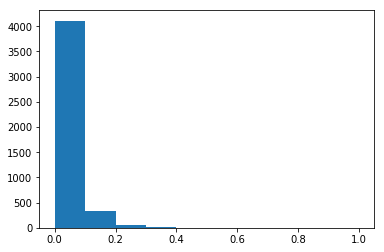

In [187]:
plt.hist(new_df.balance.values)
plt.show()

In [177]:
new_df.y.unique()

array([0, 1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52d5699cf8>,
      dtype=object)

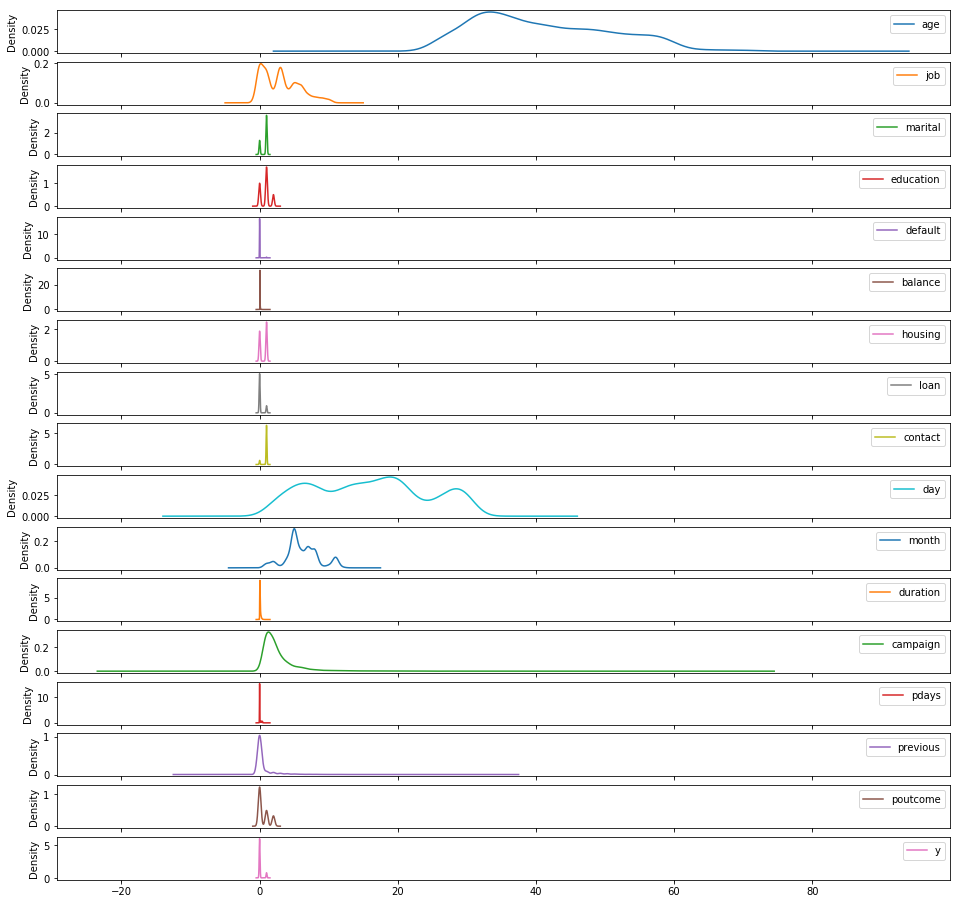

In [188]:
new_df.plot.kde(subplots=True, figsize=(16, 16))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52d5ea7a90>,
      dtype=object)

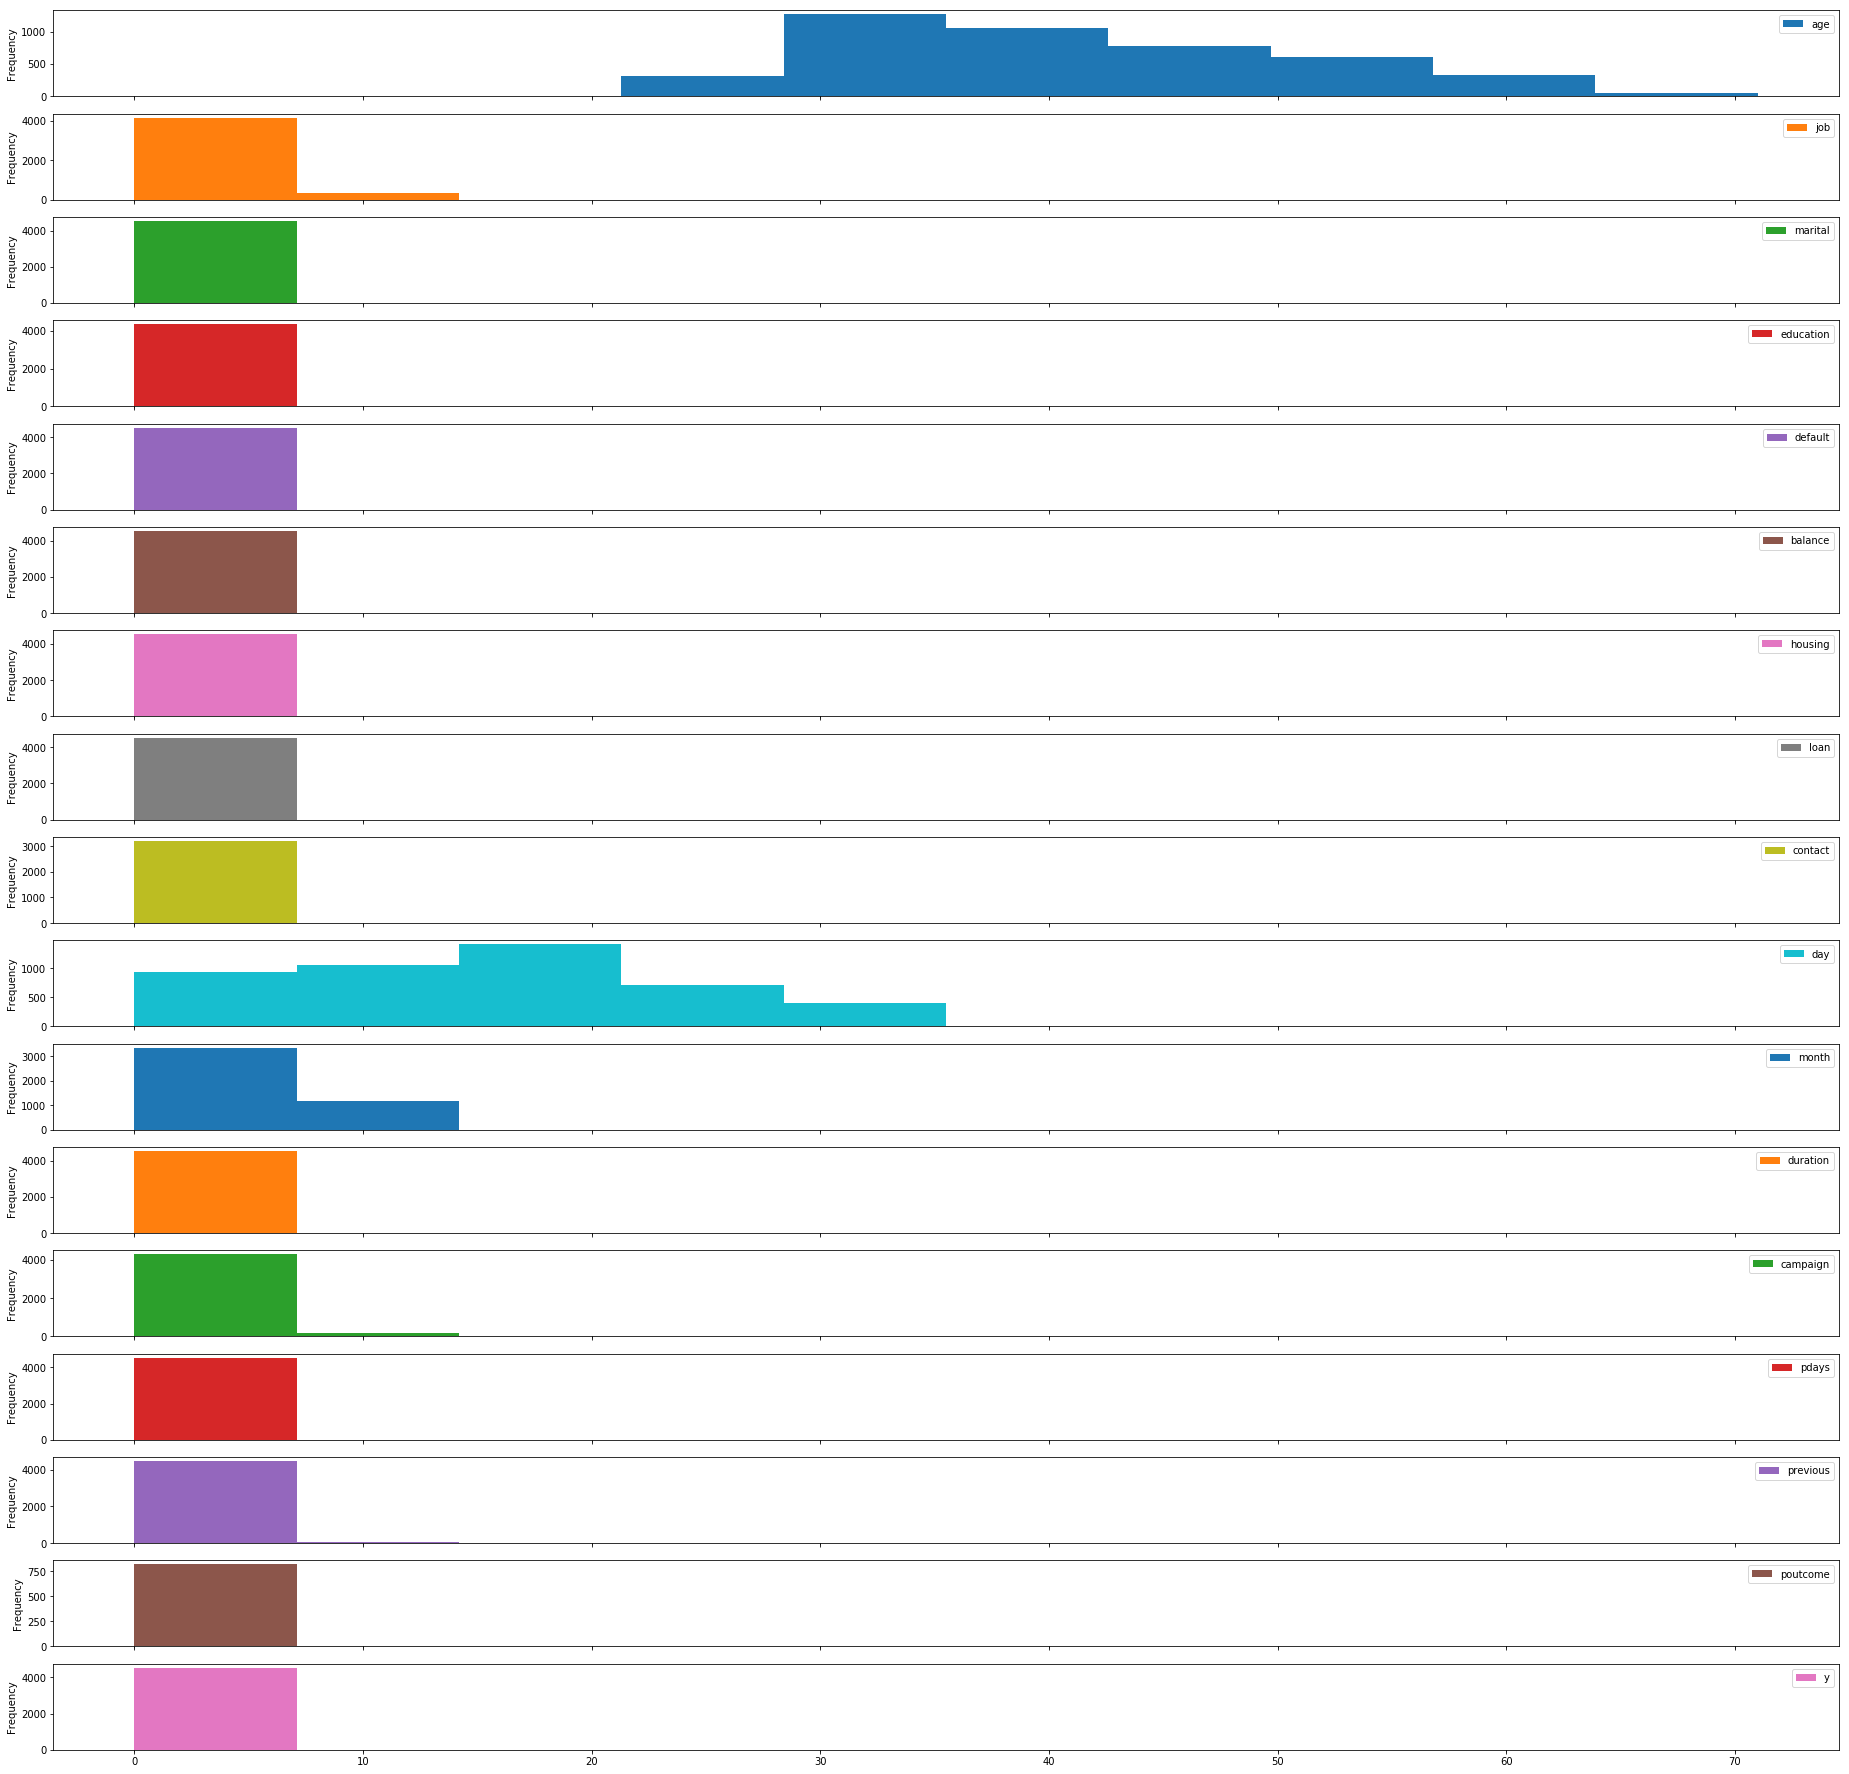

In [191]:
new_df.plot.hist(subplots=True, figsize=(32, 32))